In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('dataset/StudentsPerformance.csv')
df.head()

,gender,lunch,parental level of education,race/ethnicity,test preparation course,math score,reading score,writing score
0,female,standard,bachelor's degree,group B,none,72,72,74
1,female,standard,some college,group C,completed,69,90,88
2,female,standard,master's degree,group B,none,90,95,93
3,male,free/reduced,associate's degree,group A,none,47,57,44
4,male,standard,some college,group C,none,76,78,75


# check if there is a null value

In [5]:
df.isnull().sum()

gender                         0
lunch                          0
parental level of education    0
race/ethnicity                 0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# check the unique values of the nominal/ordinal data

In [6]:
df['gender'].value_counts()


gender
female    518
male      482
Name: count, dtype: int64

In [7]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [8]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [9]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [10]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

# test preparation 
course none -> 0, completed -> 1

In [11]:
df['test preparation course'] = df['test preparation course'].map({'none': 0, 'completed': 1})
df

,gender,lunch,parental level of education,race/ethnicity,test preparation course,math score,reading score,writing score
0,female,standard,bachelor's degree,group B,0,72,72,74
1,female,standard,some college,group C,1,69,90,88
2,female,standard,master's degree,group B,0,90,95,93
3,male,free/reduced,associate's degree,group A,0,47,57,44
4,male,standard,some college,group C,0,76,78,75
...,...,...,...,...,...,...,...,...
995,female,standard,master's degree,group E,1,88,99,95
996,male,free/reduced,high school,group C,0,62,55,55
997,female,free/reduced,high school,group C,1,59,71,65
998,female,standard,some college,group D,1,68,78,77


# lunch
free/reduced -> 0, standard -> 1

In [12]:
df['lunch'] = df['lunch'].map({'standard': 1, 'free/reduced': 0})
df

,gender,lunch,parental level of education,race/ethnicity,test preparation course,math score,reading score,writing score
0,female,1,bachelor's degree,group B,0,72,72,74
1,female,1,some college,group C,1,69,90,88
2,female,1,master's degree,group B,0,90,95,93
3,male,0,associate's degree,group A,0,47,57,44
4,male,1,some college,group C,0,76,78,75
...,...,...,...,...,...,...,...,...
995,female,1,master's degree,group E,1,88,99,95
996,male,0,high school,group C,0,62,55,55
997,female,0,high school,group C,1,59,71,65
998,female,1,some college,group D,1,68,78,77


# average score
average of math score, reading score, and writing score

In [13]:
df['average score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df

,gender,lunch,parental level of education,race/ethnicity,test preparation course,math score,reading score,writing score,average score
0,female,1,bachelor's degree,group B,0,72,72,74,72.666667
1,female,1,some college,group C,1,69,90,88,82.333333
2,female,1,master's degree,group B,0,90,95,93,92.666667
3,male,0,associate's degree,group A,0,47,57,44,49.333333
4,male,1,some college,group C,0,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,1,master's degree,group E,1,88,99,95,94.000000
996,male,0,high school,group C,0,62,55,55,57.333333
997,female,0,high school,group C,1,59,71,65,65.000000
998,female,1,some college,group D,1,68,78,77,74.333333


In [14]:
df_testprep = df[['test preparation course', 'average score']]
df_testprep

,test preparation course,average score
0,0,72.666667
1,1,82.333333
2,0,92.666667
3,0,49.333333
4,0,76.333333
...,...,...
995,1,94.000000
996,0,57.333333
997,1,65.000000
998,1,74.333333


In [15]:
df_testprep.groupby('test preparation course').mean()

,average score
test preparation course,
0,65.038941
1,72.669460


In [25]:
df_testprep.groupby('test preparation course').median()

,average score
test preparation course,
0,65.333333
1,73.500000


Text(0.5, 0.98, '')

<Figure size 800x600 with 0 Axes>

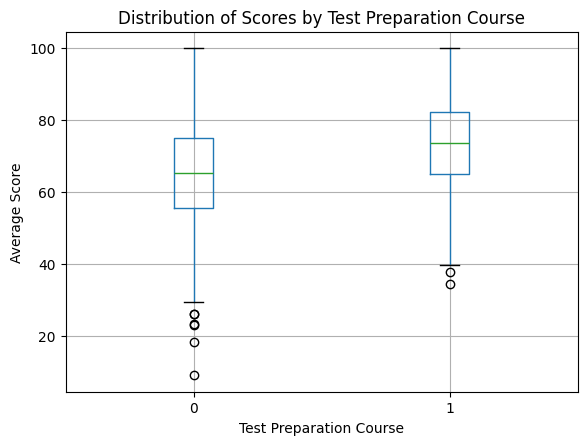

In [20]:
plt.figure(figsize=(8, 6)) 
df.boxplot(column='average score', by='test preparation course') 
plt.xlabel('Test Preparation Course') 
plt.ylabel('Average Score') 
plt.title('Distribution of Scores by Test Preparation Course') 
plt.suptitle('') # Suppress the default title to avoid redundancy plt.xticks([1, 2], ['No', 'Yes']) plt.show()

# perform two sample t-test